# Задача 9

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

import ipywidgets as widgets

Имеем уравнение вида:

$y'' + p(x)y' + q(x)y = f(x)$

$a < x < b$

$y(a) = A, y(b) = B$

Заменим производные на приближения:

$\frac{y_{i-1} - 2y_{i} + y_{i+1}}{h^2} + p_i\frac{y_{i+1} - y_{i-1}}{2h} + q_{i} y_{i} = f_i$

$y_0 = A, y_n = B$ 

Сгруппируем коэффициенты при $y_{i-1}, y_{i}, y_{i+1}$:

$(h^2q_1-2)y_1 + (1+\frac{h}{2}p_1)y_2=h^2 f_1 - A \cdot(1 - \frac{h}{2} p_1)$

$(1 - \frac{h}{2}p_i)y_{i-1} + (h^2 q_i - 2)y_i + (1 + \frac{h}{2}p_i)y_{i+1} = h^2 f_i, for \ i=2, ... , (n-2)$

$(1 - \frac{h}{2}p_{n-1})y_{n-2} + (h^2 q_{n-1} - 2)y_{n-1} = h^2 f_{n-1} - B \cdot (1 + \frac{h}{2}p_{n-1})$

In [2]:
# Tridiagonal Matrix Solver
def TMS(a, b, c, f):
    n = f.size
    
    for i in range(1, n):
        w = a[i] / b[i - 1]
        b[i] -= w * c[i - 1]
        f[i] -= w * f[i - 1]
    
    x = np.zeros(n)
    x[n - 1] = f[n - 1] / b[n - 1]
    
    for i in range(n - 2, -1, -1):
        x[i] = (f[i] - c[i] * x[i + 1]) / b[i]
    
    return x

In [3]:
def createABCF(x, p, q, F, boundaryCondLeft, boundaryCondRight):
    p_n = np.vectorize(p)(x)
    q_n = np.vectorize(q)(x)
    f_n = np.vectorize(F)(x)
    
    assert x.size > 2
    h = x[1] - x[0]
    
    n = x.size
    a, b, c, f = np.zeros_like(x), np.zeros_like(x), np.zeros_like(x), np.zeros_like(x)
    
    for i in range(n):
        a[i] = 1 - (h/2) * p_n[i]
        b[i] = h**2 * q_n[i] - 2
        c[i] = 1 + (h/2) * p_n[i]
        f[i] = h**2 * f_n[i]
    
    alpha1, beta1, C1 = boundaryCondLeft
    alpha2, beta2, C2 = boundaryCondRight
    
    # alpha1 * y(a) + beta1 * y'(a) = C1
    # alpha2 * y(b) + beta2 * y'(b) = C2
    
    a[0] = 0
    b[0] = alpha1 - beta1 / h
    c[0] = beta1 / h
    f[0] = C1
    
    a[n - 1] = - beta2 / h
    b[n - 1] = alpha2 + beta2 / h
    c[n - 1] = 0
    f[n - 1] = C2
    
    return a, b, c, f

In [4]:
# it is only for y(a) = A, y(b) = B
def groundTruth(x, A=0, B=0):
    return (A + B) / 2 + x * (B - A) / np.pi - np.sin(x)

Text(0.5, 1.0, 'Error')

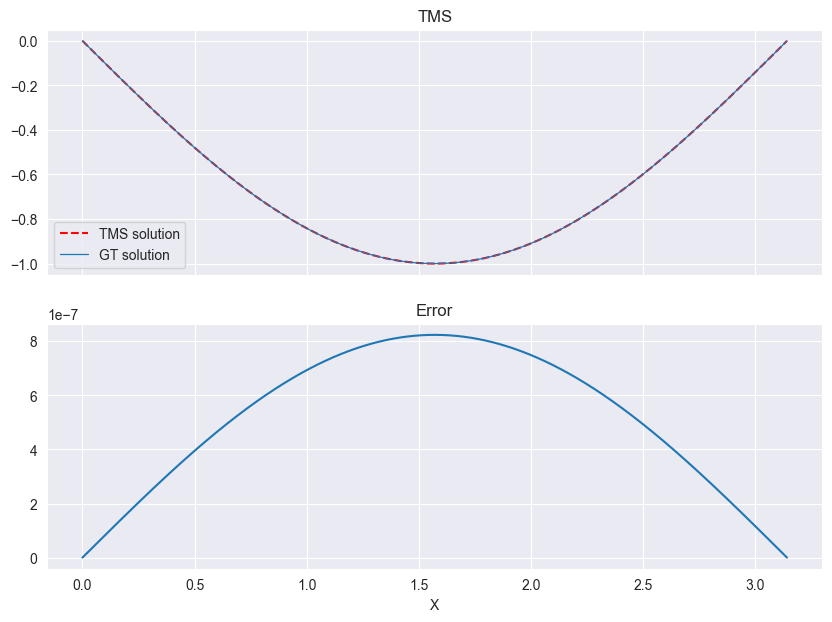

In [5]:
x0 = 0
xn = np.pi
N = int(1e3)

x = np.linspace(x0, xn, N)

y_gt = groundTruth(x)

p = lambda x: 0
q = lambda x: 0
f = np.sin

# alpha1 * y(a) + beta1 * y'(a) = C1
alpha1, beta1, C1 = (1, 0, 0)

# alpha2 * y(b) + beta2 * y'(b) = C2
alpha2, beta2, C2 = (1, 0, 0)

y = TMS(*createABCF(x, p, q, f, (alpha1, beta1, C1), (alpha2, beta2, C2)))

fg, ax = plt.subplots(2, 1, figsize=(10, 7), dpi=100, sharex=True)

ax[0].plot(x, y, 'r--', label='TMS solution')
ax[0].plot(x, y_gt, linewidth=0.9, label='GT solution') #-np.sin(x)

ax[0].set_title("TMS")
ax[0].legend(loc='best')

ax[1].plot(x, np.abs(y + np.sin(x)))
ax[1].set_xlabel("X")
ax[1].set_title("Error")

In [6]:
@widgets.interact(A=(-10, 10), B=(-10, 10))
def cringe(A=0, B=0):
    
    x0 = -np.pi / 2
    xn = np.pi / 2
    N = int(1e3)
    
    x = np.linspace(x0, xn, N)

#     y_gt = groundTruth(x, A, B)
    y_gt = (A + B) / 2 + x * (B - A) / np.pi - np.cos(x)

    p = lambda x: 0
    q = lambda x: 0
    f = np.cos
    
    # alpha1 * y(a) + beta1 * y'(a) = C1
    alpha1, beta1, C1 = (1, 0, A)
    
    # alpha2 * y(b) + beta2 * y'(b) = C2
    alpha2, beta2, C2 = (1, 0, B)
    
    y = TMS(*createABCF(x, p, q, f, (alpha1, beta1, C1), (alpha2, beta2, C2)))

    fg, ax = plt.subplots(2, 1, figsize=(10, 7), dpi=100, sharex=True)

    ax[0].plot(x, y, 'r--', label='TMS solution')
    ax[0].plot(x, y_gt, linewidth=0.9, label='GT solution')

    ax[0].set_title("TMS")
    ax[0].legend(loc='best')

    ax[1].plot(x, np.abs(y - y_gt))
    ax[1].set_xlabel("X")
    ax[1].set_title("Error")

interactive(children=(IntSlider(value=0, description='A', max=10, min=-10), IntSlider(value=0, description='B'…

Text(0.5, 1.0, 'Error')

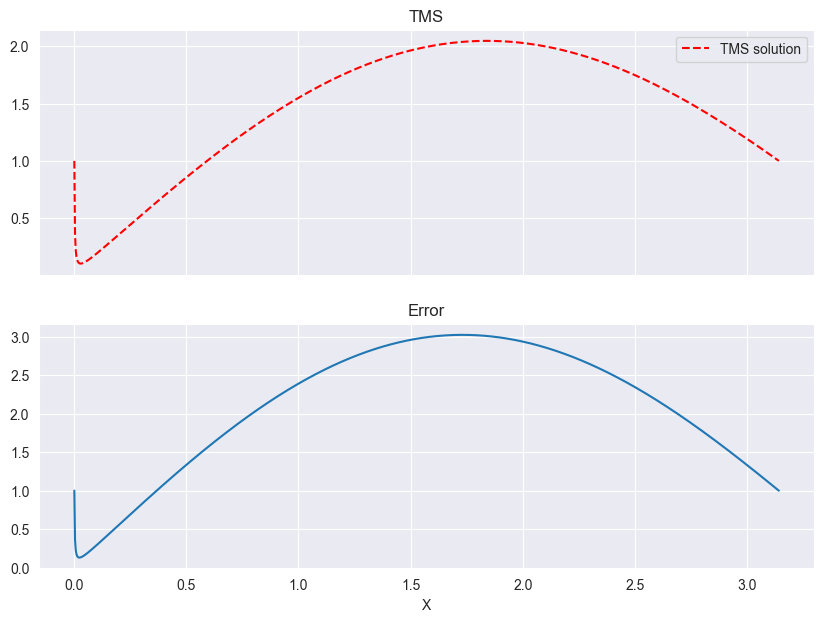

In [7]:
x0 = 0 + 1e-3
xn = np.pi
N = int(1e3)

x = np.linspace(x0, xn, N)

y_gt = groundTruth(x)

alpha = 1
p = lambda x: 1/x
q = lambda x: (x**2 - alpha**2) / x**2
f = lambda x: 0

# alpha1 * y(a) + beta1 * y'(a) = C1
alpha1, beta1, C1 = (1, 0, 1)

# alpha2 * y(b) + beta2 * y'(b) = C2
alpha2, beta2, C2 = (1, 0, 1)

y = TMS(*createABCF(x, p, q, f, (alpha1, beta1, C1), (alpha2, beta2, C2)))

fg, ax = plt.subplots(2, 1, figsize=(10, 7), dpi=100, sharex=True)

ax[0].plot(x, y, 'r--', label='TMS solution')
# ax[0].plot(x, y_gt, linewidth=0.9, label='GT solution')

ax[0].set_title("TMS")
ax[0].legend(loc='best')

ax[1].plot(x, np.abs(y - y_gt))
ax[1].set_xlabel("X")
ax[1].set_title("Error")

In [7]:
@widgets.interact(A=(-10, 10), B=(-10, 10), P1=(-10,10), P2=(-10,10), T1=(-10,10), T2=(-10,10))
def cringe(A=0, B=0, P1=1, P2=1, T1=0, T2=0):
    
    x0 = -np.pi / 2
    xn = np.pi / 2
    N = int(1e3)
    
    x = np.linspace(x0, xn, N)

#     y_gt = groundTruth(x, A, B)
    C2 = ( (T2-B)-(T1+A)*((P2+T2)/(P1+T1)) ) / ( (-1)*(P1*((P2+T2)/(P1+T1))+P2) )
    C1 = 1/(-np.pi/2*(P1+T1))*(A+T1-P1*C2)
    y_gt = C2 + x * C1 - np.cos(x)
#     y_gt = (A/P1 + B/P2) / 2 + x * (B/P2 - A/P1) / np.pi - np.cos(x)

    p = lambda x: 0
    q = lambda x: 0
    f = np.cos
    
    # alpha1 * y(a) + beta1 * y'(a) = C1
    alpha1, beta1, C1 = (P1, T1, A)
    
    # alpha2 * y(b) + beta2 * y'(b) = C2
    alpha2, beta2, C2 = (P2, T2, B)
    
    y = TMS(*createABCF(x, p, q, f, (alpha1, beta1, C1), (alpha2, beta2, C2)))

    fg, ax = plt.subplots(2, 1, figsize=(10, 7), dpi=100, sharex=True)

    ax[0].plot(x, y, 'r--', label='TMS solution')
    ax[0].plot(x, y_gt, linewidth=0.9, label='GT solution')

    ax[0].set_title("TMS")
    ax[0].legend(loc='best')

    ax[1].plot(x, np.abs(y - y_gt))
    ax[1].set_xlabel("X")
    ax[1].set_title("Error")

interactive(children=(IntSlider(value=0, description='A', max=10, min=-10), IntSlider(value=0, description='B'…